## M1S05 Ex. 01

In [2]:
import pandas as pd

In [3]:
clientes = pd.read_csv("files/clientes.csv")
clientes.head()

,id_cliente,nome,idade,cidade
0,1,Ana Souza,28,Fortaleza
1,2,Carlos Lima,35,Recife
2,3,Mariana Alves,42,Salvador
3,4,João Pereira,31,Belo Horizonte
4,5,Luciana Costa,25,São Paulo


In [4]:
pedidos = pd.read_csv("files/pedidos.csv")
pedidos.head()

,id_pedido,id_cliente,data_pedido,valor_total
0,101,1,2025-09-01,320.5
1,102,2,2025-09-03,780.0
2,103,3,2025-09-05,150.0
3,104,4,2025-09-07,540.9
4,105,5,2025-09-10,220.0


In [5]:
produtos = pd.read_csv("files/produtos.csv")
produtos.head()

,id_produto,nome,categoria,preco
0,201,Fone Bluetooth,Eletrônicos,199.9
1,202,Notebook Gamer,Eletrônicos,4999.0
2,203,Livro Python,Livros,89.9
3,204,Cadeira Gamer,Móveis,799.0
4,205,Smartphone,Eletrônicos,2999.0


In [6]:
print("\nClientes info:")
clientes.info()
print(f"Null: \n{clientes.isnull().sum()}")

print("\nPedidos info:")
pedidos.info()
print(f"Null: \n{pedidos.isnull().sum()}")

print("\nProdutos info:")
produtos.info()
print(f"Null: \n{produtos.isnull().sum()}")


Clientes info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  11 non-null     int64 
 1   nome        11 non-null     object
 2   idade       11 non-null     int64 
 3   cidade      11 non-null     object
dtypes: int64(2), object(2)
memory usage: 484.0+ bytes
Null: 
id_cliente    0
nome          0
idade         0
cidade        0
dtype: int64

Pedidos info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_pedido    10 non-null     int64  
 1   id_cliente   10 non-null     int64  
 2   data_pedido  10 non-null     object 
 3   valor_total  10 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 452.0+ bytes
Null: 
id_pedido      0
id_cliente     0
data_pedido    0
valor_tota

In [7]:
print("Descrição clientes:\n", clientes.describe())
print("Descrição pedidos:\n", pedidos.describe())
print("Descrição produtos:\n", produtos.describe())


Descrição clientes:
        id_cliente      idade
count   11.000000  11.000000
mean     6.000000  32.272727
std      3.316625   7.170647
min      1.000000  22.000000
25%      3.500000  27.500000
50%      6.000000  31.000000
75%      8.500000  36.500000
max     11.000000  45.000000
Descrição pedidos:
        id_pedido  id_cliente  valor_total
count   10.00000    10.00000     10.00000
mean   105.50000     5.50000    508.14000
std      3.02765     3.02765    364.60488
min    101.00000     1.00000    150.00000
25%    103.25000     3.25000    242.50000
50%    105.50000     5.50000    375.25000
75%    107.75000     7.75000    720.22500
max    110.00000    10.00000   1200.00000
Descrição produtos:
        id_produto        preco
count    10.00000    10.000000
mean    205.50000   974.630000
std       3.02765  1677.374824
min     201.00000    39.900000
25%     203.25000    82.400000
50%     205.50000   164.900000
75%     207.75000   686.725000
max     210.00000  4999.000000


## M1S05 Ex. 02

In [8]:
import numpy as np

# boolean indexing (mais comum, direto)
mask = clientes['idade'] > 30
resultado1 = clientes[mask]

# .loc (equivalente e útil para selecionar colunas)
resultado2 = clientes.loc[mask, :]                    # todas as colunas
resultado3 = clientes.loc[mask, ['nome', 'idade']]    # colunas específicas

# query (mais legível para expressões simples; permite variáveis com @)
min_idade = 30
resultado4 = clientes.query("idade > @min_idade")

# múltiplas condições
# resultado5 = clientes.loc[(clientes['idade'] > 30) & (clientes['cidade'] == 'SP')]

In [9]:
mask_pedidos = pedidos['valor_total'] > 500
pedidos_loc = pedidos.loc[mask_pedidos]                  # .loc com máscara booleana
pos_pedidos = np.where(mask_pedidos)[0]
pedidos_iloc = pedidos.iloc[pos_pedidos]                 # .iloc por posições

# exibir/resumir
print("Pedidos > 500 (.loc):", pedidos_loc.shape, " (.iloc):", pedidos_iloc.shape)
display(pedidos_loc.head())

Pedidos > 500 (.loc): (4, 4)  (.iloc): (4, 4)


,id_pedido,id_cliente,data_pedido,valor_total
1,102,2,2025-09-03,780.0
3,104,4,2025-09-07,540.9
5,106,6,2025-09-12,980.0
7,108,8,2025-09-18,1200.0


In [10]:
mask_produtos = produtos['categoria'] == 'Eletrônicos'
produtos_loc = produtos.loc[mask_produtos]               # .loc com máscara booleana
pos_produtos = np.where(mask_produtos)[0]
produtos_iloc = produtos.iloc[pos_produtos]              # .iloc por posições

# exibir/resumir
print("Produtos Eletrônicos (.loc):", produtos_loc.shape, " (.iloc):", produtos_iloc.shape)
display(produtos_loc.head())

Produtos Eletrônicos (.loc): (5, 4)  (.iloc): (5, 4)


,id_produto,nome,categoria,preco
0,201,Fone Bluetooth,Eletrônicos,199.9
1,202,Notebook Gamer,Eletrônicos,4999.0
4,205,Smartphone,Eletrônicos,2999.0
6,207,Mouse Óptico,Eletrônicos,79.9
8,209,Teclado Mecânico,Eletrônicos,349.9


## M1S05 Ex. 03

In [11]:
grupo = pedidos.groupby('id_cliente')
grupo['id_cliente'].count()

id_cliente
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: id_cliente, dtype: int64

In [12]:
juntos = pd.merge(pedidos, clientes, on = 'id_cliente')
juntos

,id_pedido,id_cliente,data_pedido,valor_total,nome,idade,cidade
0,101,1,2025-09-01,320.5,Ana Souza,28,Fortaleza
1,102,2,2025-09-03,780.0,Carlos Lima,35,Recife
2,103,3,2025-09-05,150.0,Mariana Alves,42,Salvador
3,104,4,2025-09-07,540.9,João Pereira,31,Belo Horizonte
4,105,5,2025-09-10,220.0,Luciana Costa,25,São Paulo
5,106,6,2025-09-12,980.0,Rafael Mendes,38,Rio de Janeiro
6,107,7,2025-09-15,430.0,Beatriz Rocha,29,Curitiba
7,108,8,2025-09-18,1200.0,Felipe Martins,45,Porto Alegre
8,109,9,2025-09-20,310.0,Juliana Silva,33,Campinas
9,110,10,2025-09-22,150.0,Daniel Oliveira,27,Natal


In [13]:
tabela_dinamica = pd.pivot_table(produtos, values='preco', index='categoria', aggfunc='mean').rename(columns={'preco': 'Preço Médio'}).rename_axis('Categorias')
tabela_dinamica

,Preço Médio
Categorias,
Eletrônicos,1725.54
Livros,89.90
Móveis,464.45
Papelaria,59.90
Utilidades,39.90


In [14]:
duplicadas = clientes[clientes.duplicated(subset='id_cliente', keep=False)]
duplicadas

,id_cliente,nome,idade,cidade


In [15]:
clientes.drop_duplicates(subset='id_cliente', keep='first', inplace=True)
clientes


,id_cliente,nome,idade,cidade
0,1,Ana Souza,28,Fortaleza
1,2,Carlos Lima,35,Recife
2,3,Mariana Alves,42,Salvador
3,4,João Pereira,31,Belo Horizonte
4,5,Luciana Costa,25,São Paulo
5,6,Rafael Mendes,38,Rio de Janeiro
6,7,Beatriz Rocha,29,Curitiba
7,8,Felipe Martins,45,Porto Alegre
8,9,Juliana Silva,33,Campinas
9,10,Daniel Oliveira,27,Natal


## M1S05 Ex. 04

In [16]:
import numpy as np

In [17]:
valores_pedidos = np.array(pedidos['valor_total'])
valores_pedidos

array([ 320.5,  780. ,  150. ,  540.9,  220. ,  980. ,  430. , 1200. ,
        310. ,  150. ])

In [18]:
print("Media: ", valores_pedidos.mean())
print("Soma: ", valores_pedidos.sum())
print("Desvio padrão: ", round(valores_pedidos.std(), 2))

Media:  508.14
Soma:  5081.4
Desvio padrão:  345.89


In [19]:
com_desconto = valores_pedidos * 0.9
com_desconto

array([ 288.45,  702.  ,  135.  ,  486.81,  198.  ,  882.  ,  387.  ,
       1080.  ,  279.  ,  135.  ])

In [20]:
print(com_desconto.dtype)
print(com_desconto.shape)

float64
(10,)


## M1S05 Ex. 05

In [21]:
indice_maior = pedidos['valor_total'].idxmax()
id_cliente = pedidos.loc[indice_maior, 'id_cliente']

cliente = clientes[clientes['id_cliente'] == id_cliente]
cliente

,id_cliente,nome,idade,cidade
7,8,Felipe Martins,45,Porto Alegre


In [22]:
preco_medio = produtos.groupby('categoria', as_index=False)['preco'].mean()
preco_medio

,categoria,preco
0,Eletrônicos,1725.54
1,Livros,89.90
2,Móveis,464.45
3,Papelaria,59.90
4,Utilidades,39.90


In [23]:
cidades = clientes.groupby('cidade', as_index=False)['id_cliente'].count().sort_values(by='id_cliente', ascending=False)

cidade_mais_popular = clientes['cidade'].value_counts().idxmax()
cidade_mais_popular

'Campinas'

### Visualização

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

ModuleNotFoundError: No module named 'matplotlib'

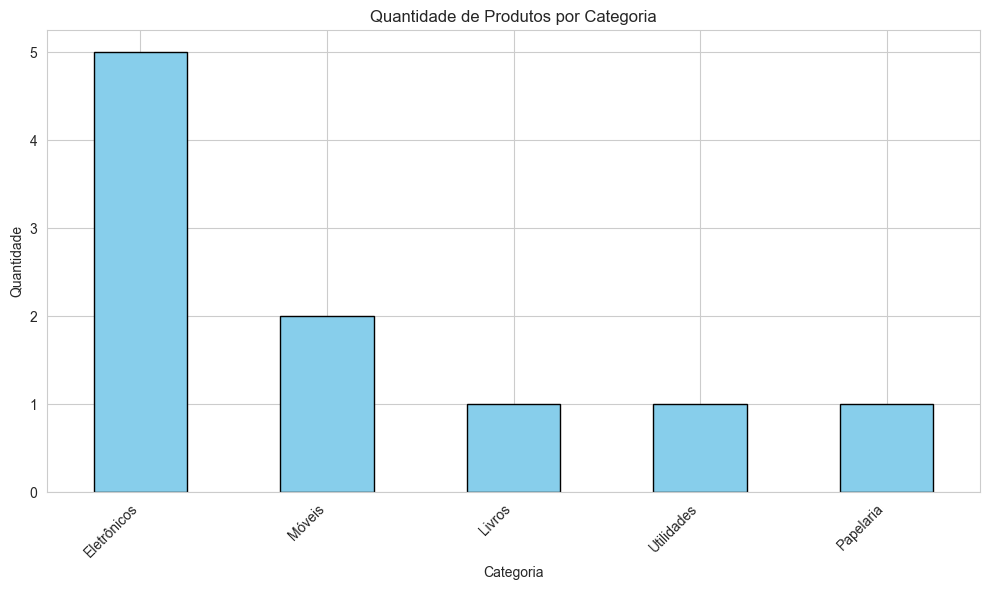

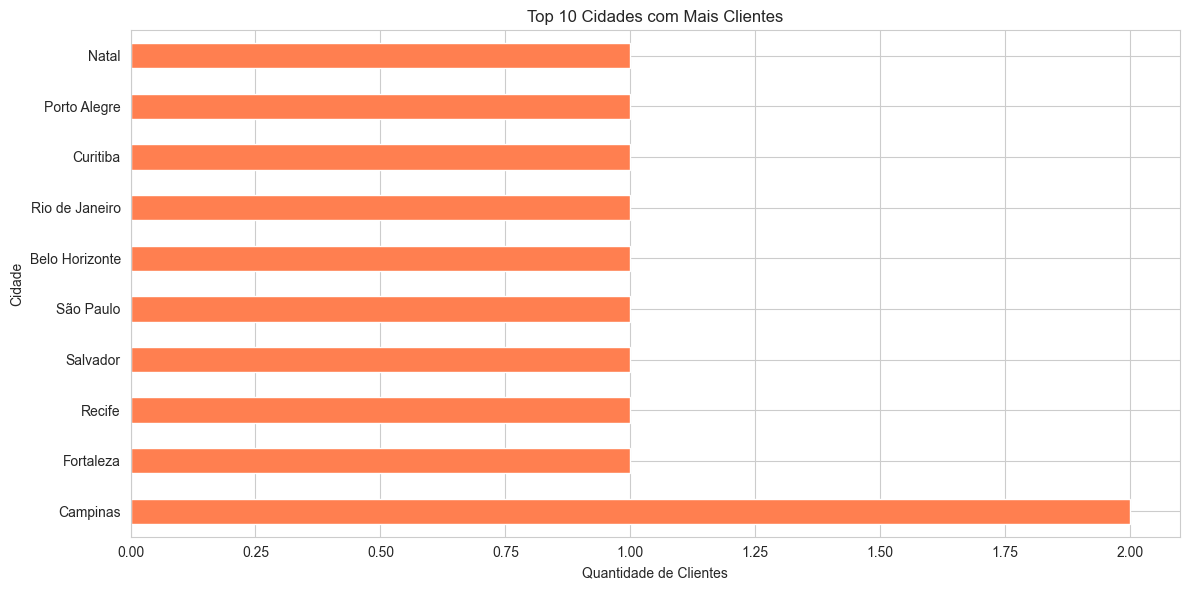

In [24]:
# Produtos por categoria
produtos_por_cat = produtos['categoria'].value_counts()
plt.figure(figsize=(10, 6))
produtos_por_cat.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Quantidade de Produtos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clientes por cidade (top 10)
top_cidades = clientes['cidade'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_cidades.plot(kind='barh', color='coral')
plt.title('Top 10 Cidades com Mais Clientes')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

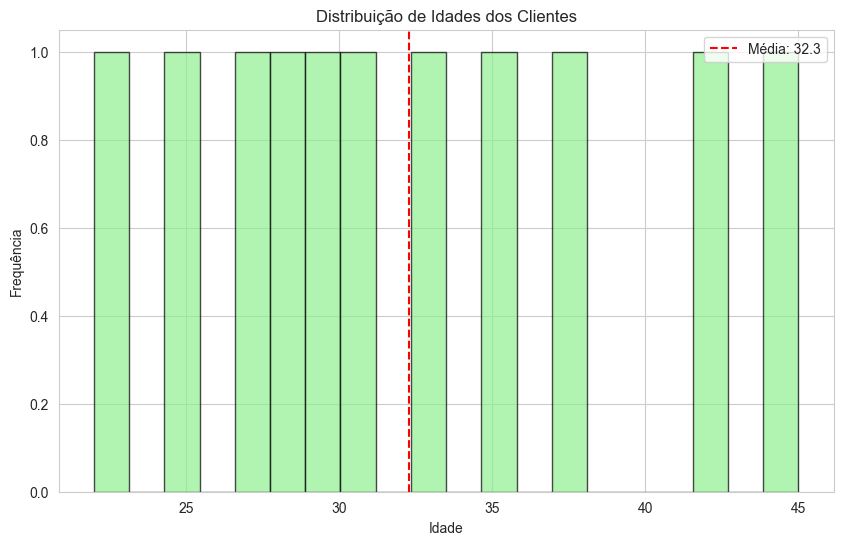

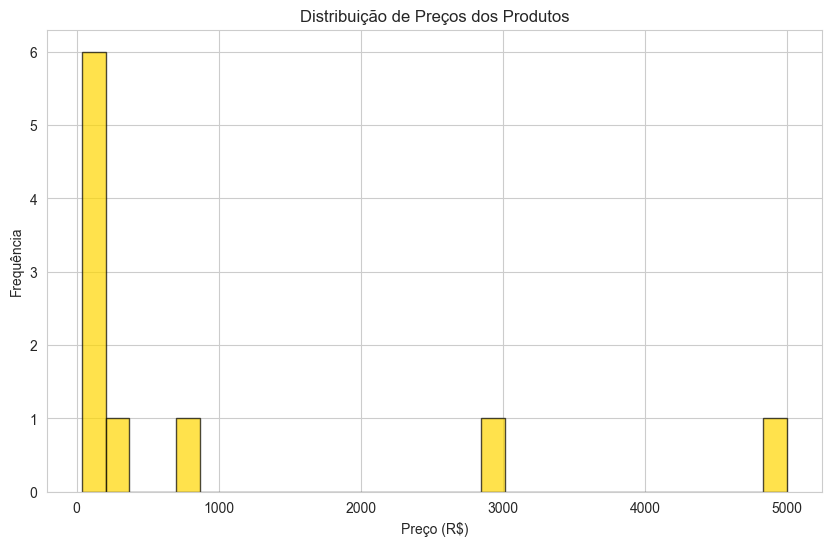

In [25]:
# Distribuição de idades
plt.figure(figsize=(10, 6))
plt.hist(clientes['idade'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Idades dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.axvline(clientes['idade'].mean(), color='red', linestyle='--', label=f"Média: {clientes['idade'].mean():.1f}")
plt.legend()
plt.show()

# Distribuição de preços
plt.figure(figsize=(10, 6))
plt.hist(produtos['preco'], bins=30, color='gold', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.show()

<Figure size 1200x600 with 0 Axes>

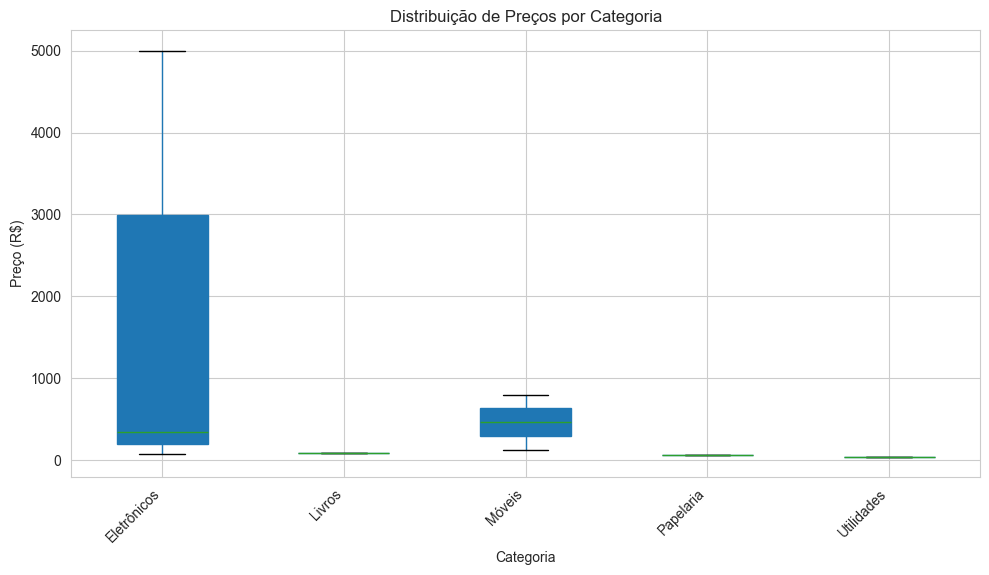

C:\Users\marco\AppData\Local\Temp\ipykernel_17520\3884029158.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=produtos, x='categoria', y='preco', palette='Set2')


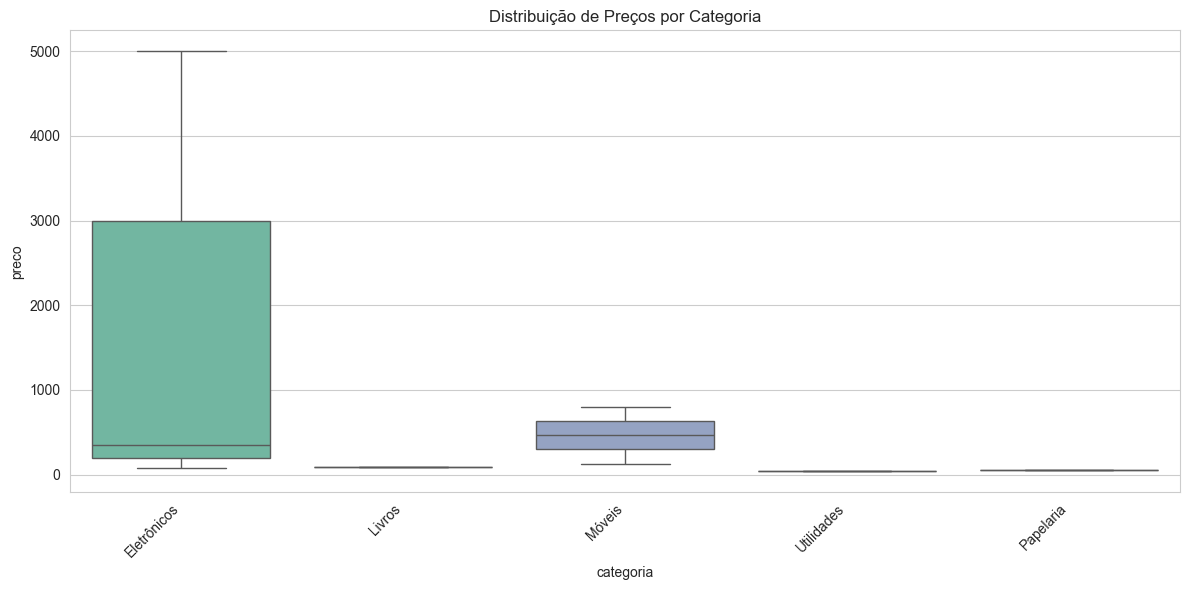

In [26]:
# Preços por categoria
plt.figure(figsize=(12, 6))
produtos.boxplot(column='preco', by='categoria', grid=True, patch_artist=True)
plt.suptitle('')
plt.title('Distribuição de Preços por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Com Seaborn (mais bonito)
plt.figure(figsize=(12, 6))
sns.boxplot(data=produtos, x='categoria', y='preco', palette='Set2')
plt.title('Distribuição de Preços por Categoria')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

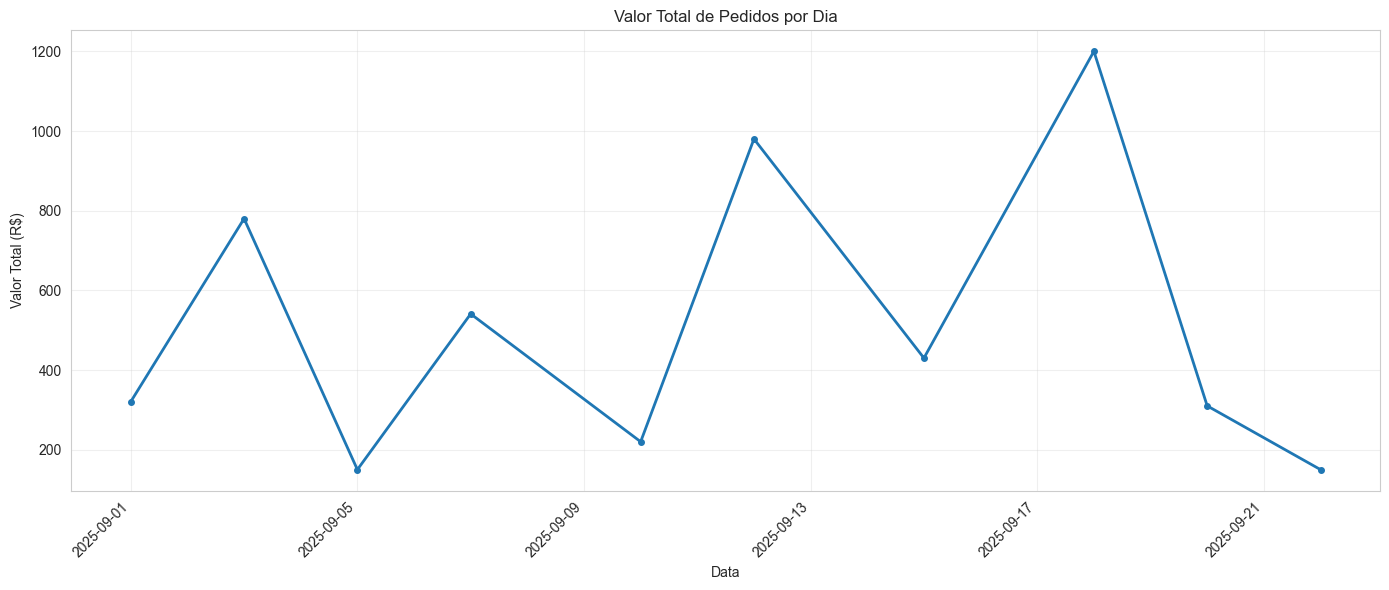

In [27]:
# Pedidos ao longo do tempo
pedidos['data_pedido'] = pd.to_datetime(pedidos['data_pedido'])
pedidos_por_dia = pedidos.groupby(pedidos['data_pedido'].dt.date)['valor_total'].sum()

plt.figure(figsize=(14, 6))
plt.plot(pedidos_por_dia.index, pedidos_por_dia.values, marker='o', linewidth=2, markersize=4)
plt.title('Valor Total de Pedidos por Dia')
plt.xlabel('Data')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

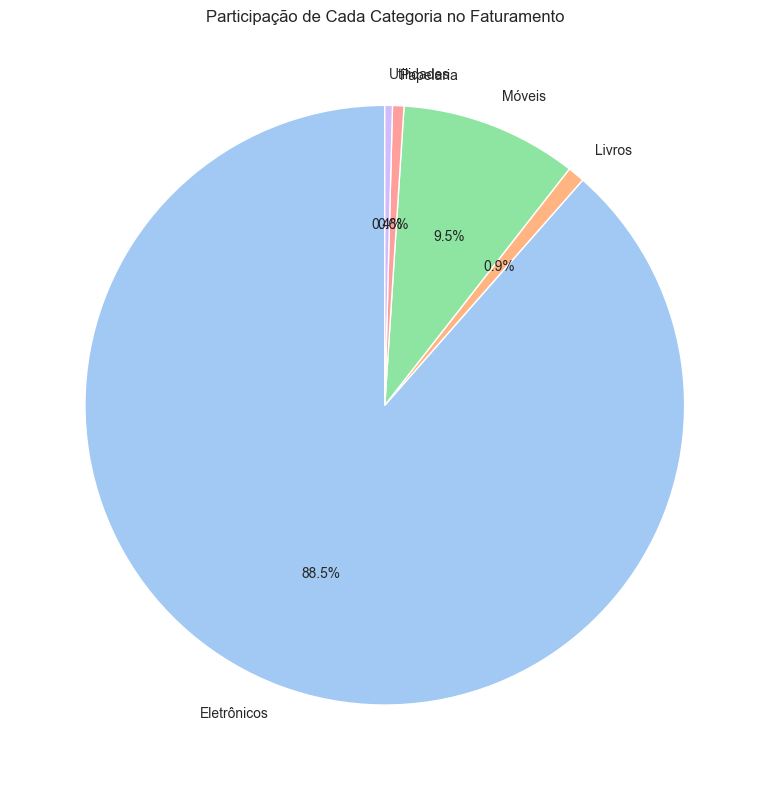

In [28]:
# Participação de cada categoria no faturamento
faturamento_cat = produtos.groupby('categoria')['preco'].sum()

plt.figure(figsize=(10, 8))
plt.pie(faturamento_cat, labels=faturamento_cat.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Participação de Cada Categoria no Faturamento')
plt.tight_layout()
plt.show()

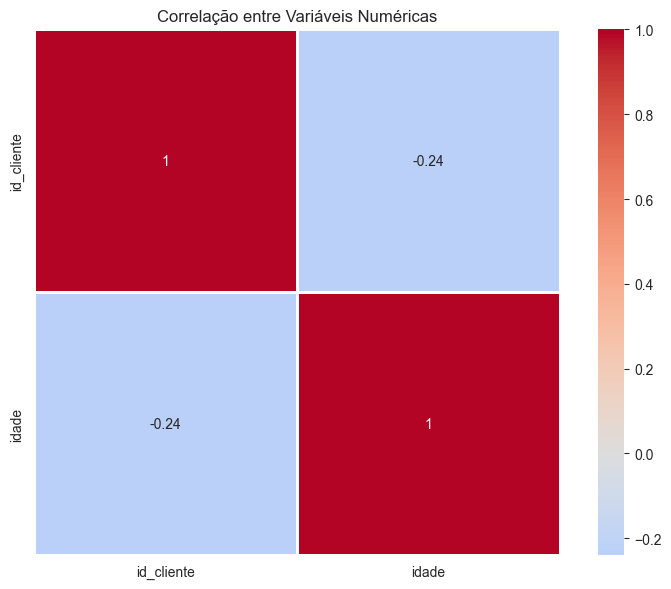

In [29]:
# Correlação entre variáveis numéricas
numericas = clientes.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm', center=0, linewidths=1, square=True)
plt.title('Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

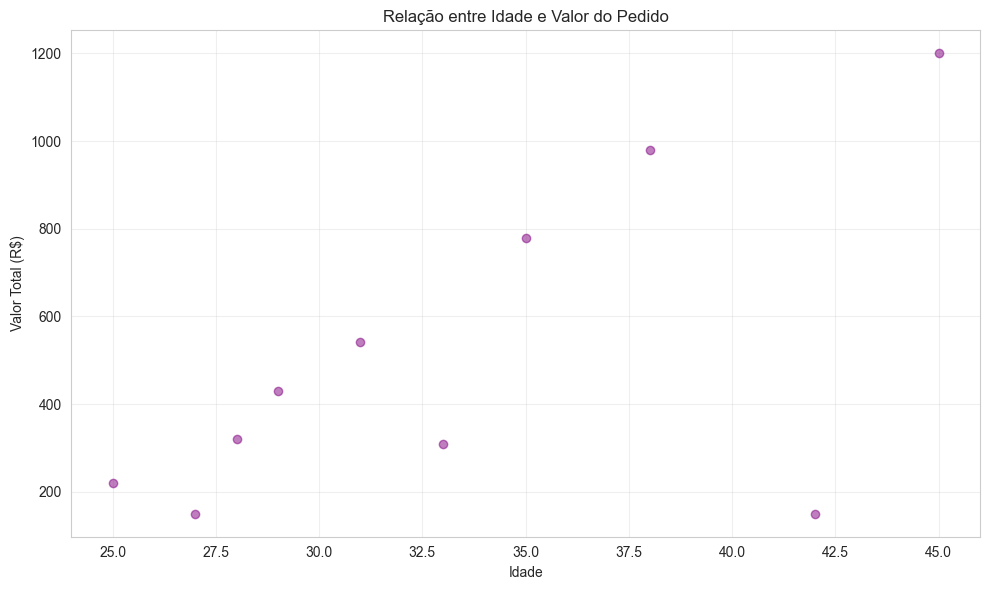

In [30]:
# Relação idade vs valor total (merge necessário)
dados_completos = pedidos.merge(clientes, on='id_cliente')

plt.figure(figsize=(10, 6))
plt.scatter(dados_completos['idade'], dados_completos['valor_total'], alpha=0.5, c='purple')
plt.title('Relação entre Idade e Valor do Pedido')
plt.xlabel('Idade')
plt.ylabel('Valor Total (R$)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

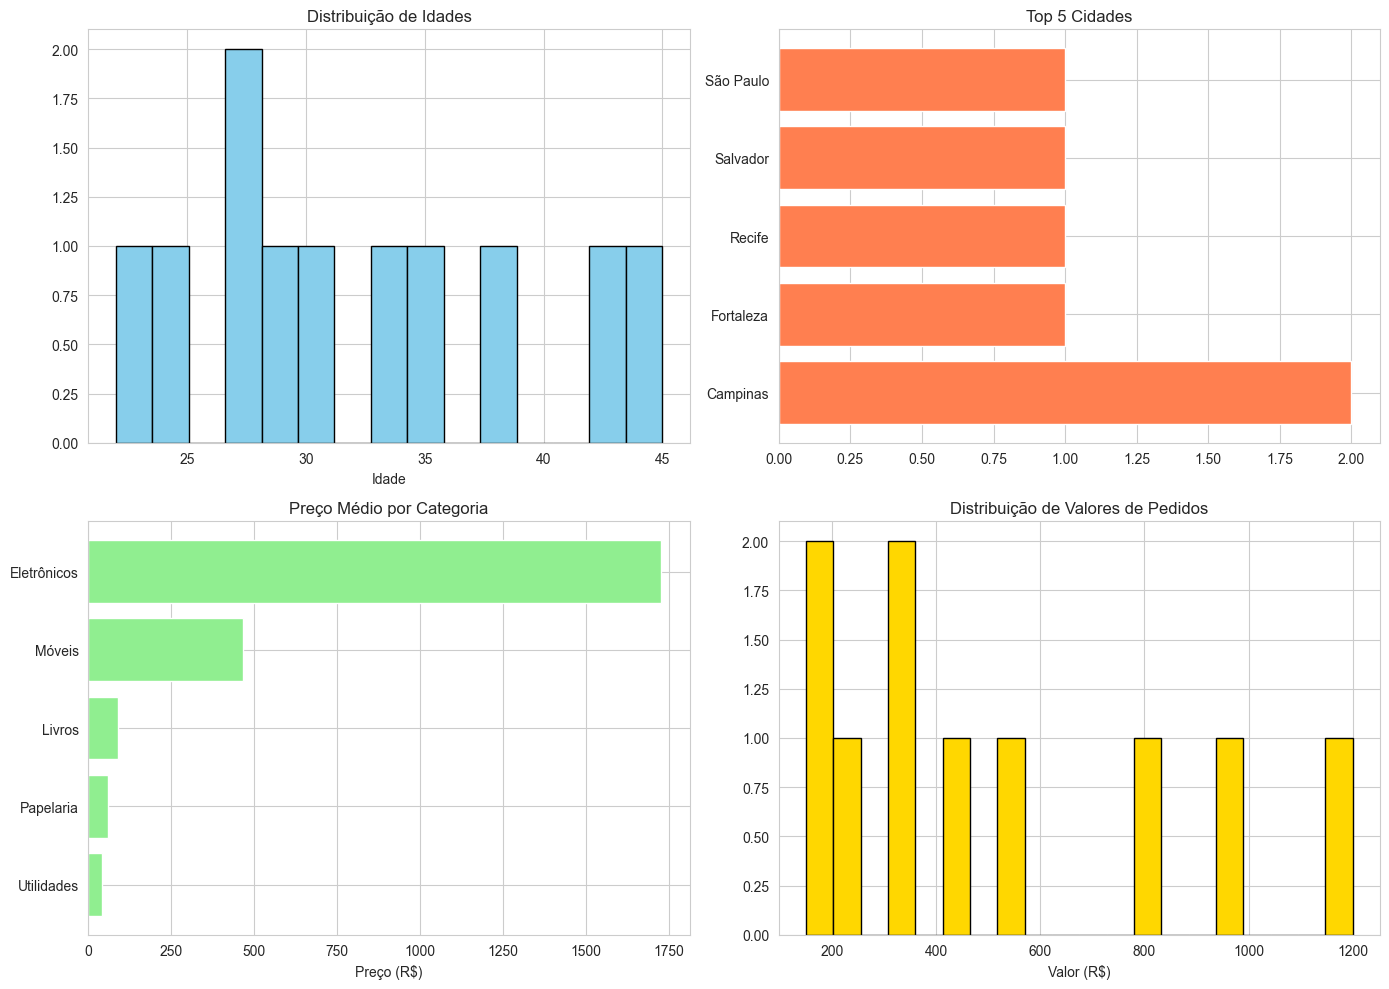

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1) Histograma de idades
axes[0, 0].hist(clientes['idade'], bins=15, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribuição de Idades')
axes[0, 0].set_xlabel('Idade')

# 2) Top 5 cidades
top5 = clientes['cidade'].value_counts().head(5)
axes[0, 1].barh(top5.index, top5.values, color='coral')
axes[0, 1].set_title('Top 5 Cidades')

# 3) Preço médio por categoria
preco_medio = produtos.groupby('categoria')['preco'].mean().sort_values()
axes[1, 0].barh(preco_medio.index, preco_medio.values, color='lightgreen')
axes[1, 0].set_title('Preço Médio por Categoria')
axes[1, 0].set_xlabel('Preço (R$)')

# 4) Distribuição de valores de pedidos
axes[1, 1].hist(pedidos['valor_total'], bins=20, color='gold', edgecolor='black')
axes[1, 1].set_title('Distribuição de Valores de Pedidos')
axes[1, 1].set_xlabel('Valor (R$)')

plt.tight_layout()
plt.show()